In [27]:
import numpy as np
import pandas as pd

In [28]:
df = pd.read_csv("/content/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [29]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [30]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [31]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [32]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [34]:
lin2 = LinearRegression()
lin2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

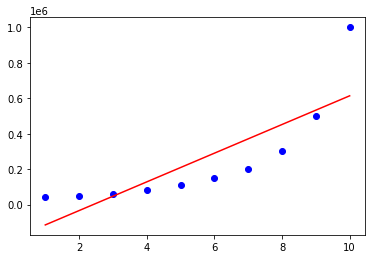

In [36]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='blue')
plt.plot(x,lin.predict(x),color="red")

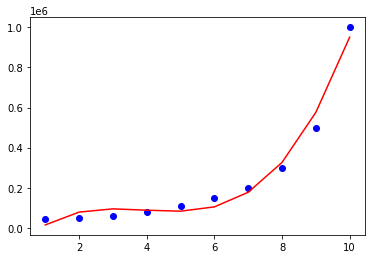

In [38]:
plt.scatter(x,y,color='blue')
plt.plot(x,lin2.predict(poly.fit_transform(x)),color="red")

In [40]:
lin2.predict(poly.fit_transform([[7.5]]))

array([240915.35547786])

Bangalore House price dataset

In [85]:
import numpy as np
import pandas as pd  

In [86]:
df = pd.read_csv("/content/bangalore house price prediction OHE-data.csv")
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Chandapura,...,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Panathur,location_Kudlu Gate,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Talaghattapura,location_Mysore Road,location_Kadugodi,location_Frazer Town,location_Dodda Nekkundi,location_Devanahalli,location_Kanakapura,location_Attibele,location_Anekal,location_Lakshminarayana Pura,location_Nagarbhavi,location_Ananth Nagar,location_5th Phase JP Nagar,location_TC Palaya,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Jalahalli,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
df.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [88]:
x = df.drop(columns='price' , axis=1)
y = df['price']

In [89]:
x

,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Chandapura,location_HSR Layout,...,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Panathur,location_Kudlu Gate,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Talaghattapura,location_Mysore Road,location_Kadugodi,location_Frazer Town,location_Dodda Nekkundi,location_Devanahalli,location_Kanakapura,location_Attibele,location_Anekal,location_Lakshminarayana Pura,location_Nagarbhavi,location_Ananth Nagar,location_5th Phase JP Nagar,location_TC Palaya,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Jalahalli,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,3.0,2.0,2900.0,3,11206.896552,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7116,3.0,1.0,1780.0,3,4765.730337,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7117,2.0,1.0,880.0,2,5454.545455,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7118,2.0,1.0,1000.0,2,5500.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
x.size

761840

In [90]:
y

0       150.00
1       149.00
2       150.00
3        40.00
4        83.00
         ...  
7115    325.00
7116     84.83
7117     48.00
7118     55.00
7119     78.00
Name: price, Length: 7120, dtype: float64

In [119]:
y.size

7120

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.69474992,  0.55447784,  0.21042674, ..., -0.05307449,
        -0.05307449, -0.05307449],
       [ 0.69474992,  1.85228824,  0.29579247, ..., -0.05307449,
        -0.05307449, -0.05307449],
       [ 0.69474992,  0.55447784,  0.29579247, ..., -0.05307449,
        -0.05307449, -0.05307449],
       ...,
       [-0.44581255, -0.74333255, -0.65636376, ..., -0.05307449,
        -0.05307449, -0.05307449],
       [-0.44581255, -0.74333255, -0.52503187, ..., -0.05307449,
        -0.05307449, -0.05307449],
       [-0.44581255, -0.74333255, -0.08725889, ..., -0.05307449,
        -0.05307449, -0.05307449]])

In [92]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=0)

In [93]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(x_train)
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

In [94]:
x_train_poly.shape , x_test_poly.shape

((5696, 5886), (1424, 5886))

In [95]:
from sklearn.linear_model import LinearRegression
lin =LinearRegression()
lin.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
y_pred = lin.predict(x_test_poly)
y_pred

array([ 68.,  36.,  61., ...,  90.,  75., 864.])

In [104]:
y_test

1189     68.0
5876     36.0
5597     61.0
3391     85.0
6122     64.0
        ...  
5830    187.0
4887     57.0
1861     90.0
3014     75.0
1670    864.0
Name: price, Length: 1424, dtype: float64

In [105]:
lin.score(x_test_poly , y_test)

0.9999426059340636

In [108]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)

rmse , mse

(0.8536531763150472, 0.7287237454327691)

In [113]:
x_test_poly.size

8381664

In [115]:
x_train_poly.size

33526656

In [116]:
y_train.size

5696

In [117]:
y_test.size

1424

ValueError: ignored

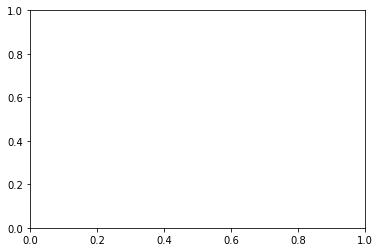

In [111]:
plt.scatter(x_test_poly , y_test)
plt.plot(x_train_poly , lin.predict(poly.transform(x_train)))